In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from community import community_louvain

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler


In [2]:
# Read in the excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('City Network.xlsx')
# Show contents of the dataframe
randstad_network

,weight,0,b
0,40.0,Amsterdam,Utrecht
1,28.7,Leiden,Schiphol
2,22.9,Den Haag,Leiden
3,17.4,Woerden,Gouda
4,19.9,Utrecht,Woerden
5,24.1,Woerden,Alphen aan de rijn
6,7.5,Den Haag,Delft
7,19.9,Zaandam,Amsterdam
8,25.5,Zaandam,Haarlem
9,21.5,Haarlem,Schiphol


In [3]:
# Make a graph from the dataframe
Randstad_Graph=nx.from_pandas_edgelist(randstad_network, 0, 'b', ['weight'])

In [4]:
print(nx.nodes(Randstad_Graph))

['Amsterdam', 'Utrecht', 'Leiden', 'Schiphol', 'Den Haag', 'Woerden', 'Gouda', 'Alphen aan de rijn', 'Delft', 'Zaandam', 'Haarlem', 'Almere', 'Hilversum', 'Zoetermeer', 'Amersfoort', 'Rotterdam', 'Vlaardingen', 'Spijkenisse', 'Dordrecht']


In [5]:
dsp = nx.shortest_path(Randstad_Graph, source='Amsterdam', target='Delft')
print(dsp)

['Amsterdam', 'Schiphol', 'Leiden', 'Den Haag', 'Delft']


In [6]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft')
print(dspl)

4


In [7]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft',weight='weight')
print(dspl)

78.3


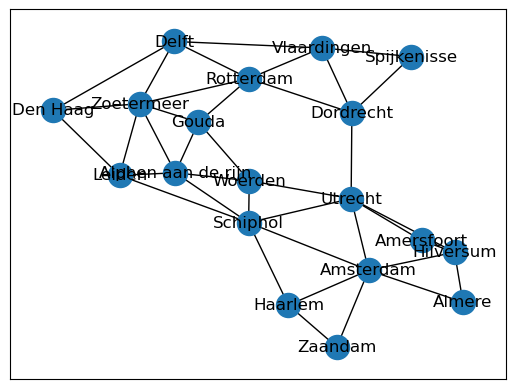

In [8]:
# Plot the graph
nx.draw_networkx(Randstad_Graph)

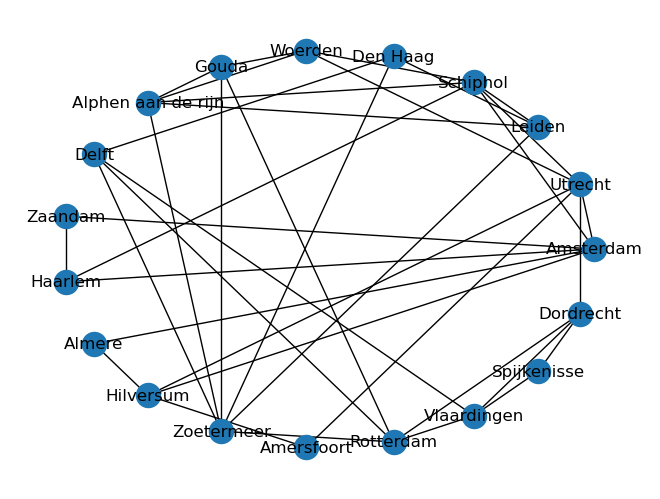

In [9]:
# Plot the graph, using a cicular layout
#nx.draw_circular(Randstad_Graph)
nx.draw_circular(Randstad_Graph, with_labels=True)

In [10]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Amsterdam': 28.974999999999998,
 'Utrecht': 49.82142857142857,
 'Leiden': 15.07142857142857,
 'Schiphol': 38.29285714285714,
 'Den Haag': 2.2928571428571427,
 'Woerden': 9.195238095238095,
 'Gouda': 5.5619047619047635,
 'Alphen aan de rijn': 10.038095238095238,
 'Delft': 5.542857142857142,
 'Zaandam': 0.0,
 'Haarlem': 3.6083333333333334,
 'Almere': 0.0,
 'Hilversum': 5.7023809523809526,
 'Zoetermeer': 13.864285714285712,
 'Amersfoort': 0.0,
 'Rotterdam': 13.291666666666664,
 'Vlaardingen': 7.639285714285713,
 'Spijkenisse': 0.0,
 'Dordrecht': 31.10238095238095}

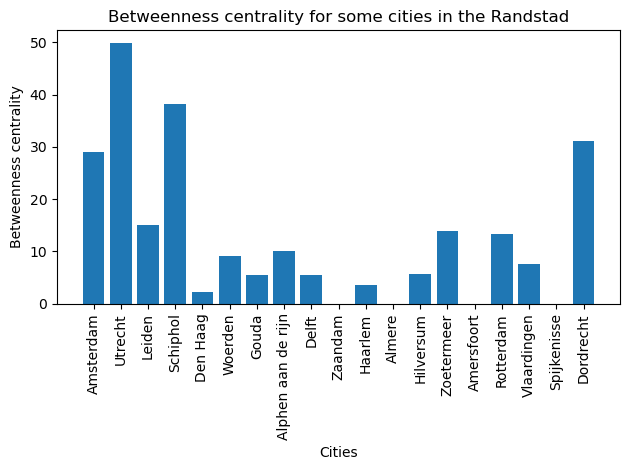

In [11]:
# Plot the values in a bar chart
plt.bar(range(len(betweenness)), betweenness.values(), align='center')
plt.xticks(range(len(betweenness)), list(betweenness.keys()))
plt.title("Betweenness centrality for some cities in the Randstad")
plt.xlabel("Cities")
plt.ylabel("Betweenness centrality")
plt.xticks(rotation=90)
plt.tight_layout()

In [12]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weigthed = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                             k=None, 
                                                             normalized=True, 
                                                             weight='weight', 
                                                             seed=None)
edge_betweenness_weigthed

{('Amsterdam', 'Utrecht'): 0.029239766081871343,
 ('Amsterdam', 'Zaandam'): 0.09941520467836257,
 ('Amsterdam', 'Schiphol'): 0.1695906432748538,
 ('Amsterdam', 'Almere'): 0.05263157894736842,
 ('Amsterdam', 'Hilversum'): 0.04093567251461988,
 ('Amsterdam', 'Haarlem'): 0.029239766081871343,
 ('Utrecht', 'Woerden'): 0.2046783625730994,
 ('Utrecht', 'Schiphol'): 0.011695906432748537,
 ('Utrecht', 'Hilversum'): 0.1111111111111111,
 ('Utrecht', 'Amersfoort'): 0.07602339181286549,
 ('Utrecht', 'Dordrecht'): 0.03508771929824561,
 ('Leiden', 'Schiphol'): 0.19883040935672514,
 ('Leiden', 'Den Haag'): 0.07017543859649122,
 ('Leiden', 'Alphen aan de rijn'): 0.03508771929824561,
 ('Leiden', 'Zoetermeer'): 0.14035087719298245,
 ('Schiphol', 'Haarlem'): 0.07017543859649122,
 ('Schiphol', 'Woerden'): 0.023391812865497075,
 ('Schiphol', 'Alphen aan de rijn'): 0.05263157894736842,
 ('Den Haag', 'Delft'): 0.06432748538011696,
 ('Den Haag', 'Zoetermeer'): 0.04093567251461988,
 ('Woerden', 'Gouda'): 0.192

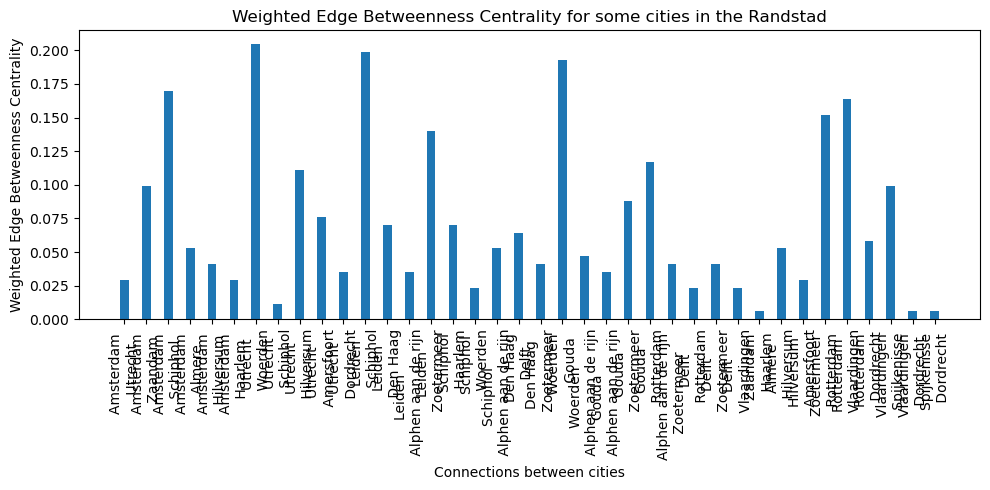

In [13]:
# Helper function for parsing the edge labels
def ppEdges (l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(edge_betweenness_weigthed)), edge_betweenness_weigthed.values(), width=0.4)
plt.xticks(range(len(edge_betweenness_weigthed)), ppEdges(list(edge_betweenness_weigthed.keys())))
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.xticks(rotation=90)
plt.tight_layout()

In [14]:
# first print all nodes/cities
list(nx.nodes(Randstad_Graph)) 

['Amsterdam',
 'Utrecht',
 'Leiden',
 'Schiphol',
 'Den Haag',
 'Woerden',
 'Gouda',
 'Alphen aan de rijn',
 'Delft',
 'Zaandam',
 'Haarlem',
 'Almere',
 'Hilversum',
 'Zoetermeer',
 'Amersfoort',
 'Rotterdam',
 'Vlaardingen',
 'Spijkenisse',
 'Dordrecht']

In [15]:
#print all edges/connections in the network
list (nx.edges(Randstad_Graph))

[('Amsterdam', 'Utrecht'),
 ('Amsterdam', 'Zaandam'),
 ('Amsterdam', 'Schiphol'),
 ('Amsterdam', 'Almere'),
 ('Amsterdam', 'Hilversum'),
 ('Amsterdam', 'Haarlem'),
 ('Utrecht', 'Woerden'),
 ('Utrecht', 'Schiphol'),
 ('Utrecht', 'Hilversum'),
 ('Utrecht', 'Amersfoort'),
 ('Utrecht', 'Dordrecht'),
 ('Leiden', 'Schiphol'),
 ('Leiden', 'Den Haag'),
 ('Leiden', 'Alphen aan de rijn'),
 ('Leiden', 'Zoetermeer'),
 ('Schiphol', 'Haarlem'),
 ('Schiphol', 'Woerden'),
 ('Schiphol', 'Alphen aan de rijn'),
 ('Den Haag', 'Delft'),
 ('Den Haag', 'Zoetermeer'),
 ('Woerden', 'Gouda'),
 ('Woerden', 'Alphen aan de rijn'),
 ('Gouda', 'Alphen aan de rijn'),
 ('Gouda', 'Zoetermeer'),
 ('Gouda', 'Rotterdam'),
 ('Alphen aan de rijn', 'Zoetermeer'),
 ('Delft', 'Rotterdam'),
 ('Delft', 'Zoetermeer'),
 ('Delft', 'Vlaardingen'),
 ('Zaandam', 'Haarlem'),
 ('Almere', 'Hilversum'),
 ('Hilversum', 'Amersfoort'),
 ('Zoetermeer', 'Rotterdam'),
 ('Rotterdam', 'Vlaardingen'),
 ('Rotterdam', 'Dordrecht'),
 ('Vlaardingen', 

In [16]:
# print all the shortest paths in the network from each city
L = list(nx.all_pairs_dijkstra(Randstad_Graph))

In [17]:
#betweenness centrality (B for betweeness centrality) 
B = nx.betweenness_centrality(Randstad_Graph)

In [18]:
#Degree centrality (D for Degree centrality) 
D = nx.degree_centrality(Randstad_Graph)

In [19]:
#closeness centrality (C for closeness )
C = nx.closeness_centrality(Randstad_Graph)

In [20]:
# create a dataframe to store centrality measures
df = pd.DataFrame({
    'Node': list(Randstad_Graph.nodes),
    'Betweenness Centrality': [B[node] for node in Randstad_Graph.nodes],
    'Degree Centrality': [D[node] for node in Randstad_Graph.nodes],
    'Closeness Centrality': [C[node] for node in Randstad_Graph.nodes]
})


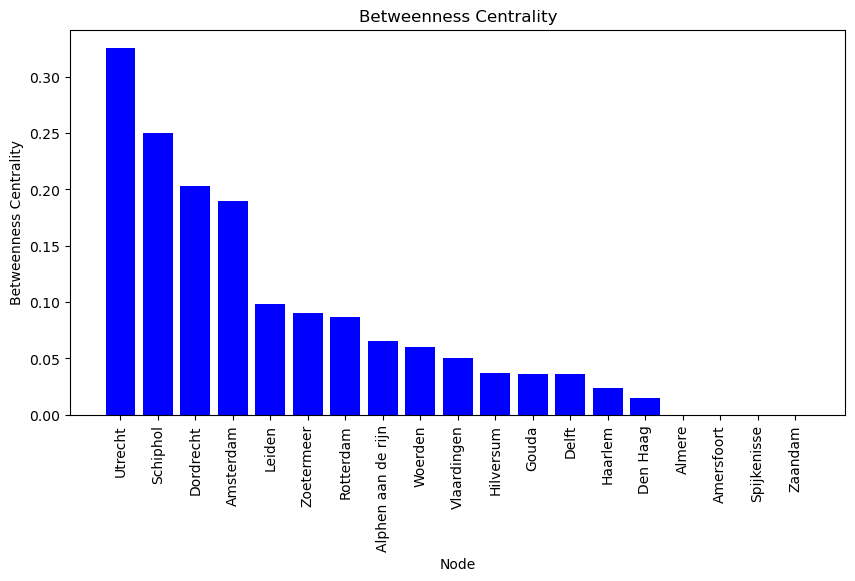

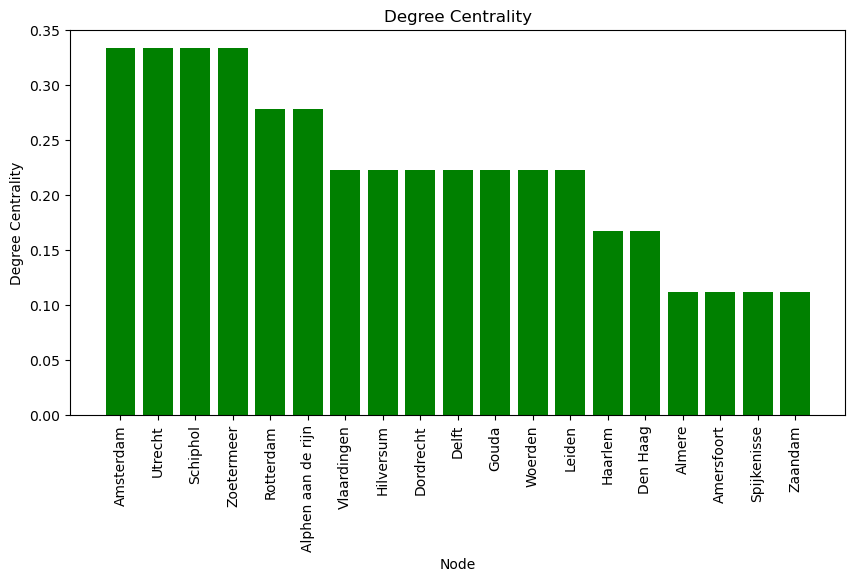

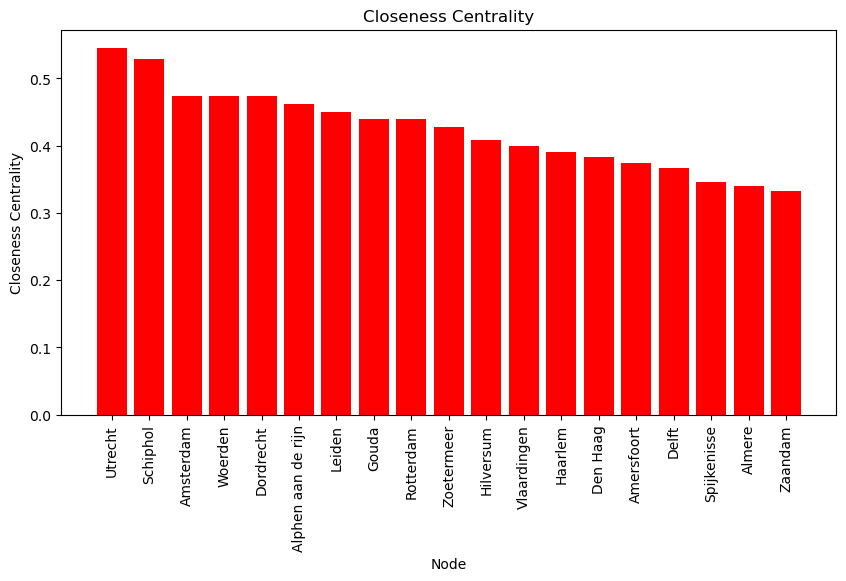

In [21]:
#plot 3 graphs to visualize the results in the dataframe and see which cities are most significant 
# change the data frame so it is sorted, then plot betweenness centrality in a sorted way 
df_sorted_betweenness = df.sort_values(by='Betweenness Centrality', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(df_sorted_betweenness['Node'], df_sorted_betweenness['Betweenness Centrality'], color='blue')
plt.title('Betweenness Centrality')
plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)
plt.show()

# change the data frame so it is sorted, then plot degree centrality
df_sorted_degree = df.sort_values(by='Degree Centrality', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(df_sorted_degree['Node'], df_sorted_degree['Degree Centrality'], color='green')
plt.title('Degree Centrality')
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=90)
plt.show()

# change the data frame so it is sorted, then plot closeness centrality
df_sorted_closeness = df.sort_values(by='Closeness Centrality', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(df_sorted_closeness['Node'], df_sorted_closeness['Closeness Centrality'], color='red')
plt.title('Closeness Centrality')
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')
plt.xticks(rotation=90)
plt.show()

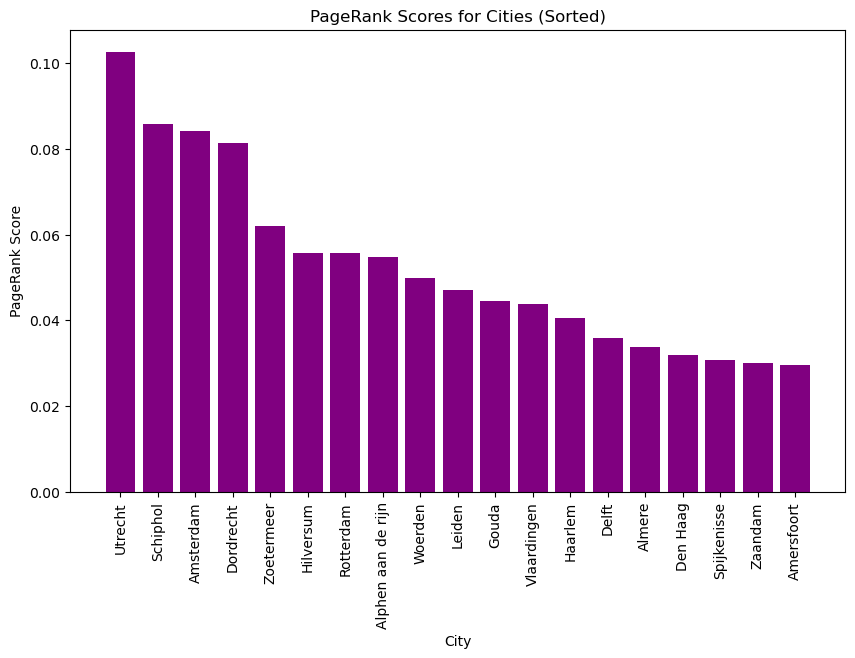

In [22]:
#calculate and plot the page ranks of the cities, to see their relative importance 
page_rank = nx.pagerank(Randstad_Graph)

# Sort PageRank scores by value in descending order
sorted_page_rank = dict(sorted(page_rank.items(), key=lambda item: item[1], reverse=True))

# Plot sorted PageRank scores
plt.figure(figsize=(10, 6))
plt.bar(sorted_page_rank.keys(), sorted_page_rank.values(), color='purple')
plt.title('PageRank Scores for Cities (Sorted)')
plt.xlabel('City')
plt.ylabel('PageRank Score')
plt.xticks(rotation=90)
plt.show()

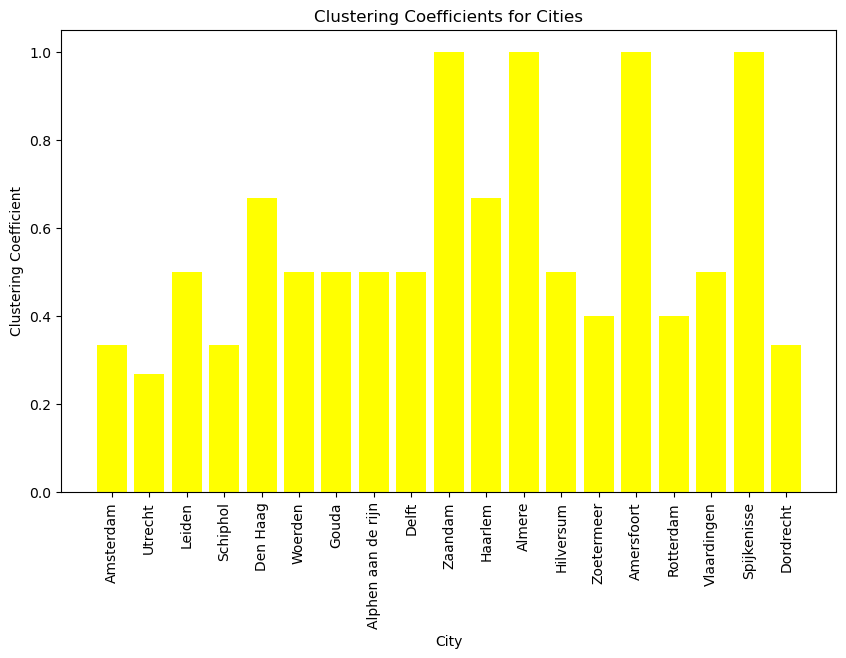

In [23]:
#Calculate clustering coefficients
clustering_coefficients = nx.clustering(Randstad_Graph)

# Plot clustering coefficients
plt.figure(figsize=(10, 6))
plt.bar(clustering_coefficients.keys(), clustering_coefficients.values(), color='yellow')
plt.title('Clustering Coefficients for Cities')
plt.xlabel('City')
plt.ylabel('Clustering Coefficient')
plt.xticks(rotation=90)
plt.show()

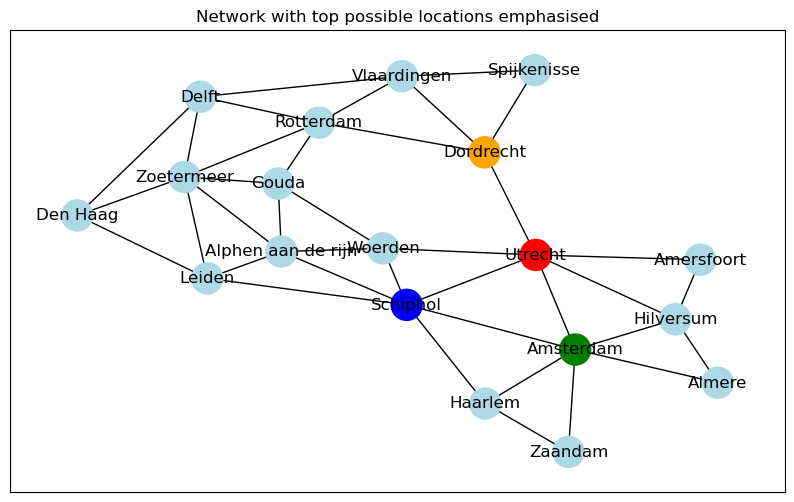

In [24]:
#make a new visualisation with the top 4 places we are now considering 
#define node colors
node_colors = {
    'Utrecht': 'red',
    'Schiphol': 'blue',
    'Amsterdam': 'green',
    'Dordrecht': 'orange'
}

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(Randstad_Graph) 
nx.draw_networkx_nodes(Randstad_Graph, pos=pos, node_color=[node_colors.get(node, 'lightblue') for node in Randstad_Graph.nodes()], node_size=500)

nx.draw_networkx_edges(Randstad_Graph, pos=pos)

nx.draw_networkx_labels(Randstad_Graph, pos=pos)

plt.title('Network with top possible locations emphasised')
plt.show()

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

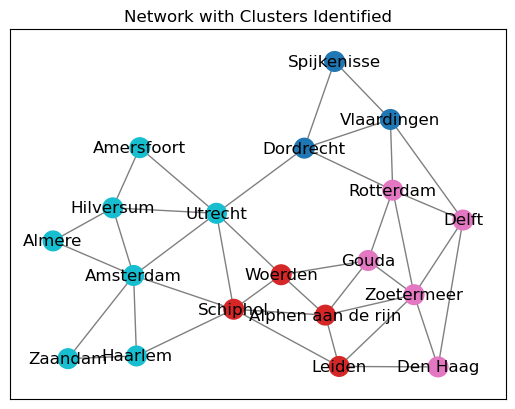

In [25]:
partition = community_louvain.best_partition(Randstad_Graph)


pos = nx.spring_layout(Randstad_Graph)  # Positions for all nodes


# Draw nodes and edges
nx.draw_networkx_nodes(Randstad_Graph, pos, node_size=200, cmap=plt.get_cmap('tab10'), node_color=list(partition.values()))
nx.draw_networkx_edges(Randstad_Graph, pos, alpha=0.5)


# Draw node labels
nx.draw_networkx_labels(Randstad_Graph, pos)


plt.title("Network with Clusters Identified")
plt.show()


In [26]:
#to normalize the data we need to define the populations of each city
populations = {
    'Amsterdam': 1056,
    'Haarlem': 190,
    'Schiphol': 187,
    'Leiden': 146,
    'Den Haag': 647,
    'Zoetermeer': 146,
    'Delft': 122,
    'Rotterdam': 763,
    'Spijkenisse': 83,
    'Dordrecht': 140,
    'Vlaardingen': 86,
    'Alphen aan de rijn': 131,
    'Gouda': 87,
    'Woerden': 61,
    'Utrecht': 423,
    'Hilversum': 107,
    'Almere': 256,
    'Amersfoort': 185,
    'Zaandam': 184
}

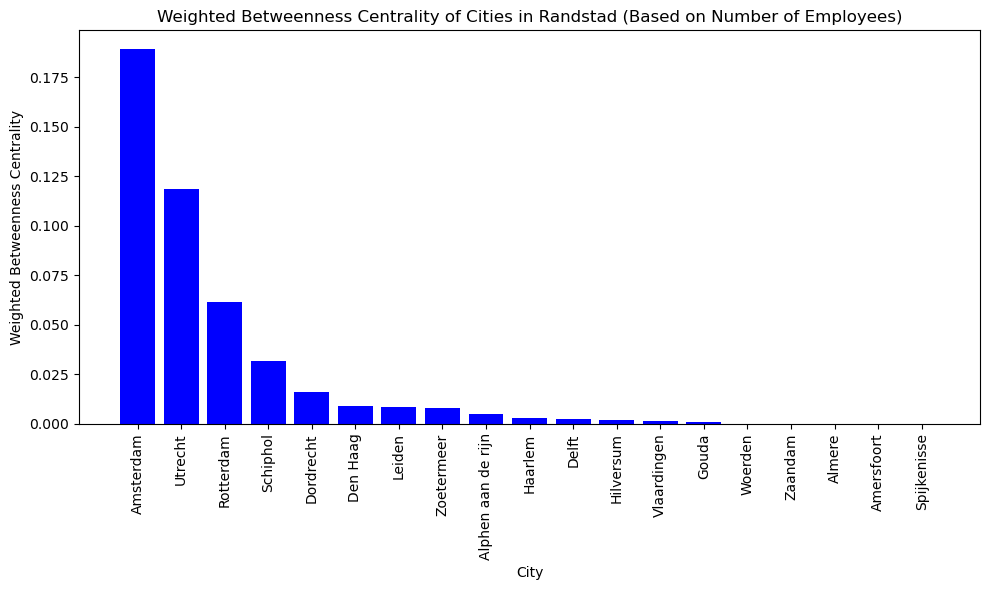

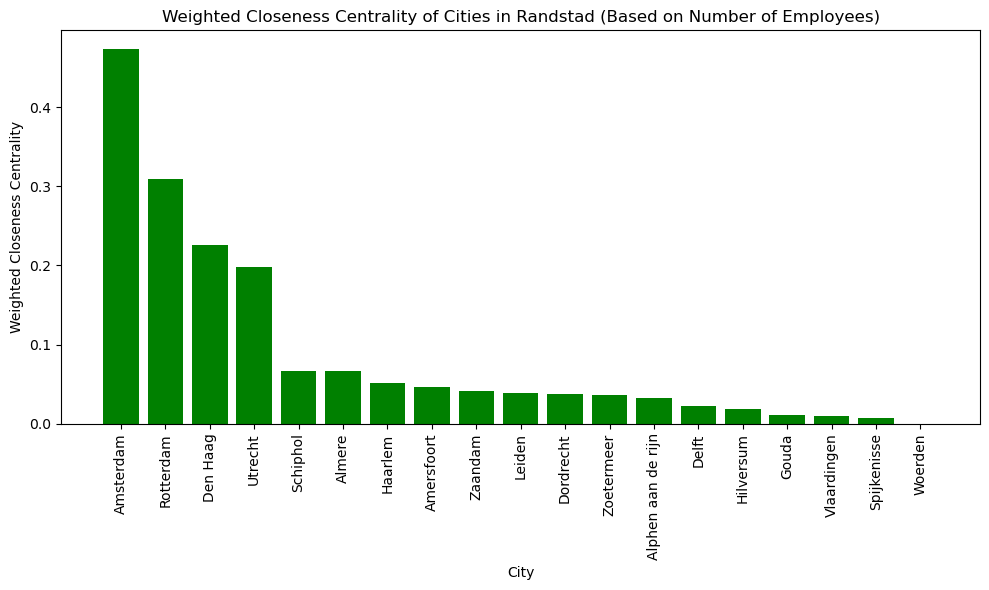

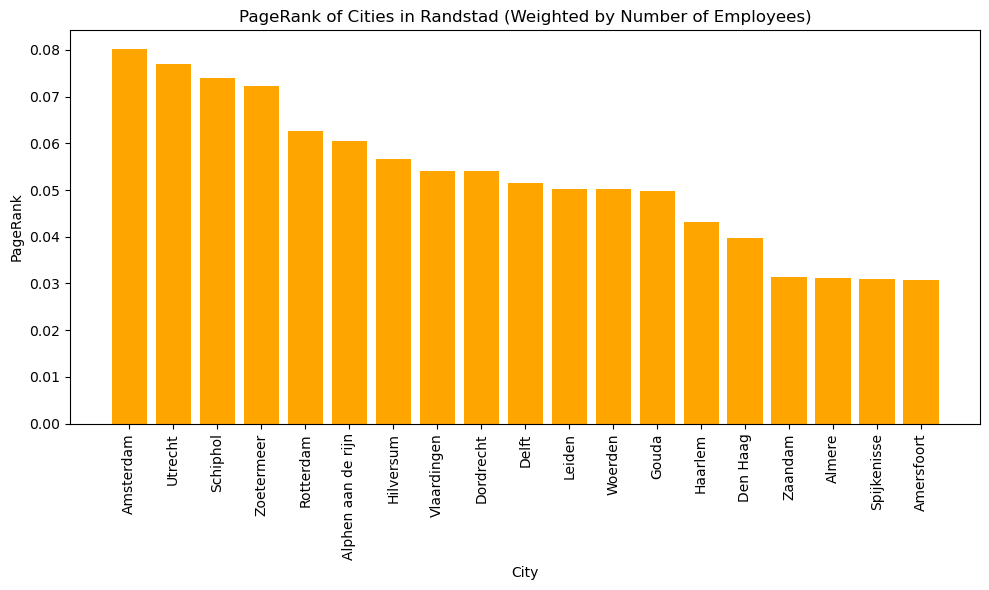

In [27]:
# scale the population between 0 and 1 to add weights of population to the graph
scaler = MinMaxScaler()
scaled_populations = scaler.fit_transform([[pop] for pop in populations.values()]).flatten()

# attach weights to each node
for city, scaled_pop in zip(populations.keys(), scaled_populations):
    Randstad_Graph.nodes[city]['employee_weight_factor'] = scaled_pop

# weighted betweenness centrality
B_weighted = {city: nx.betweenness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in Randstad_Graph.nodes()}

# weighted closeness centrality
C_weighted = {city: nx.closeness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in Randstad_Graph.nodes()}

# PageRank with weight
pagerank = nx.pagerank(Randstad_Graph, weight='employee_weight_factor')

# Sort 
B_sorted = dict(sorted(B_weighted.items(), key=lambda item: item[1], reverse=True))
C_sorted = dict(sorted(C_weighted.items(), key=lambda item: item[1], reverse=True))
pagerank_sorted = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))

# Plot 

# Weighted Betweenness Centrality
plt.figure(figsize=(10, 6))
plt.bar(B_sorted.keys(), B_sorted.values(), color='blue')
plt.xlabel('City')
plt.ylabel('Weighted Betweenness Centrality')
plt.title('Weighted Betweenness Centrality of Cities in Randstad (Based on Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted Closeness Centrality
plt.figure(figsize=(10, 6))
plt.bar(C_sorted.keys(), C_sorted.values(), color='green')
plt.xlabel('City')
plt.ylabel('Weighted Closeness Centrality')
plt.title('Weighted Closeness Centrality of Cities in Randstad (Based on Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted PageRank
plt.figure(figsize=(10, 6))
plt.bar(pagerank_sorted.keys(), pagerank_sorted.values(), color='orange')
plt.xlabel('City')
plt.ylabel('PageRank')
plt.title('PageRank of Cities in Randstad (Weighted by Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\HP1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Partition 1: ['Amsterdam', 'Utrecht', 'Zaandam', 'Haarlem', 'Almere', 'Hilversum', 'Amersfoort', 'Spijkenisse', 'Dordrecht']
Partition 2: ['Leiden', 'Schiphol', 'Den Haag', 'Woerden', 'Gouda', 'Alphen aan de rijn', 'Delft', 'Zoetermeer', 'Rotterdam', 'Vlaardingen']


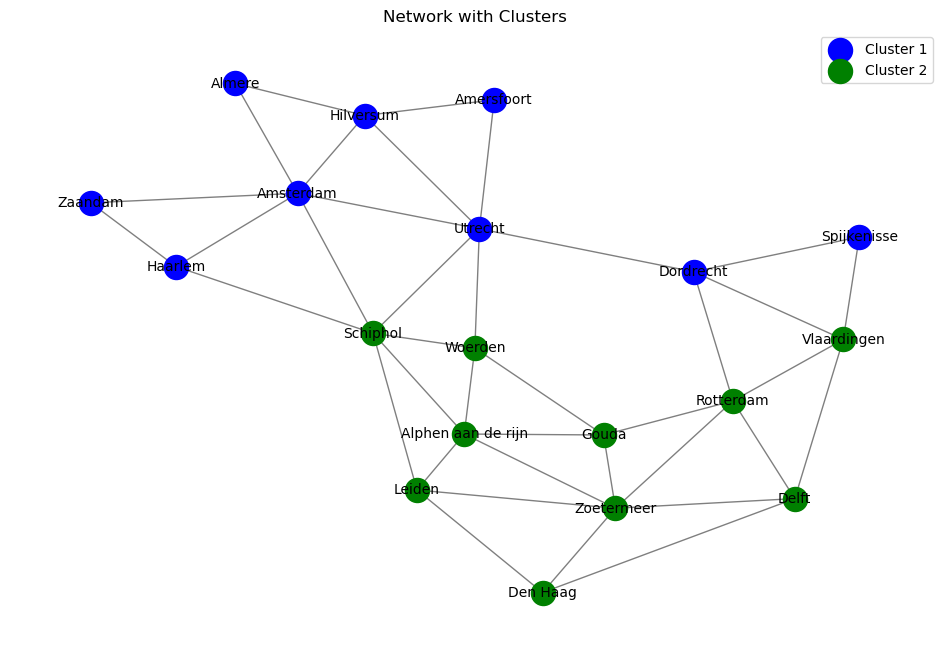

In [28]:
# now we partition the graph into 2 areas based on population and proximity using code
# scale distances 
distances = StandardScaler().fit_transform(nx.linalg.graphmatrix.adjacency_matrix(Randstad_Graph).toarray())

# scale populations
scaled_population_array = StandardScaler().fit_transform(np.array([populations[node] for node in Randstad_Graph.nodes()]).reshape(-1, 1))

# create one matrix wiht both
combined_features = np.concatenate((scaled_population_array, distances), axis=1)

# lset clusters to 2
n_clusters = 2 
labels = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42).fit_predict(combined_features)

partition_1 = [node for node, label in zip(Randstad_Graph.nodes(), labels) if label == 0]
partition_2 = [node for node, label in zip(Randstad_Graph.nodes(), labels) if label == 1]

print("Partition 1:", partition_1)
print("Partition 2:", partition_2)

# draw clusters
pos = nx.spring_layout(Randstad_Graph) 
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(Randstad_Graph, pos, nodelist=partition_1, node_color='blue', node_size=300, label='Cluster 1')
nx.draw_networkx_nodes(Randstad_Graph, pos, nodelist=partition_2, node_color='green', node_size=300, label='Cluster 2')
nx.draw_networkx_edges(Randstad_Graph, pos, alpha=0.5)
nx.draw_networkx_labels(Randstad_Graph, pos, font_size=10)

plt.title('Network with Clusters')
plt.legend()
plt.axis('off')
plt.show() 


In [29]:
# Manually adjust partitions
partition_1 = [ 'Leiden', 'Den Haag', 'Zoetermeer', 'Delft', 'Rotterdam', 'Spijkenisse', 'Dordrecht' , 'Vlaardingen', 'Alphen aan de rijn', 'Gouda', 'Woerden',]
partition_2 = [ 'Amsterdam', 'Haarlem', 'Schiphol', 'Utrecht', 'Hilversum', 'Almere', 'Amersfoort', 'Zaandam']


In [30]:
# calculate the best cities in each cluster so there is always the shortest path

def calculate_weighted_total_shortest_path_lengths(graph, partition, populations):
    weighted_total_shortest_path_lengths = {}
    for city in partition:
        total_shortest_path_length = sum(nx.shortest_path_length(graph, city, target) for target in partition if target != city)
        weighted_total_shortest_path_lengths[city] = total_shortest_path_length / populations[city]  # Scale by population
    return weighted_total_shortest_path_lengths

# Calculate weighted total shortest path lengths for each city in partition_1 and partition_2
weighted_total_shortest_path_lengths_partition_1 = calculate_weighted_total_shortest_path_lengths(Randstad_Graph, partition_1, populations)
weighted_total_shortest_path_lengths_partition_2 = calculate_weighted_total_shortest_path_lengths(Randstad_Graph, partition_2, populations)

# Find city with the overall shortest path in each cluster
shortest_path_city_partition_1 = min(weighted_total_shortest_path_lengths_partition_1, key=weighted_total_shortest_path_lengths_partition_1.get)
shortest_path_city_partition_2 = min(weighted_total_shortest_path_lengths_partition_2, key=weighted_total_shortest_path_lengths_partition_2.get)

print("City with the overall shortest path in partition 1:", shortest_path_city_partition_1)
print("City with the overall shortest path in partition 2:", shortest_path_city_partition_2)


City with the overall shortest path in partition 1: Rotterdam
City with the overall shortest path in partition 2: Amsterdam


In [31]:
# Manually create partitions
partition_1 = [ 'Leiden', 'Den Haag', 'Zoetermeer', 'Delft', 'Rotterdam', 'Spijkenisse', 'Dordrecht' , 'Vlaardingen', 'Alphen aan de rijn', 'Gouda', 'Woerden',]
partition_2 = [ 'Amsterdam', 'Haarlem', 'Schiphol', 'Utrecht', 'Hilversum', 'Almere', 'Amersfoort', 'Zaandam']



In [ ]:
# Calculate weighted betweenness centrality for each partition
B_weighted_partition_1 = {city: nx.betweenness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in partition_1}
B_weighted_partition_2 = {city: nx.betweenness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in partition_2}

# Calculate weighted closeness centrality for each partition
C_weighted_partition_1 = {city: nx.closeness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in partition_1}
C_weighted_partition_2 = {city: nx.closeness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in partition_2}

# Calculate PageRank with weight for each partition
pagerank_partition_1 = nx.pagerank(Randstad_Graph, weight='employee_weight_factor', personalization={city: 1/len(partition_1) for city in partition_1})
pagerank_partition_2 = nx.pagerank(Randstad_Graph, weight='employee_weight_factor', personalization={city: 1/len(partition_2) for city in partition_2})

# Sort the weighted measures for each partition
B_sorted_partition_1 = dict(sorted(B_weighted_partition_1.items(), key=lambda item: item[1], reverse=True))
C_sorted_partition_1 = dict(sorted(C_weighted_partition_1.items(), key=lambda item: item[1], reverse=True))
pagerank_sorted_partition_1 = dict(sorted(pagerank_partition_1.items(), key=lambda item: item[1], reverse=True))

B_sorted_partition_2 = dict(sorted(B_weighted_partition_2.items(), key=lambda item: item[1], reverse=True))
C_sorted_partition_2 = dict(sorted(C_weighted_partition_2.items(), key=lambda item: item[1], reverse=True))
pagerank_sorted_partition_2 = dict(sorted(pagerank_partition_2.items(), key=lambda item: item[1], reverse=True))

# Plot the weighted measures for each partition

# Weighted Betweenness Centrality Partition 1
plt.figure(figsize=(10, 6))
plt.bar(list(B_sorted_partition_1.keys()), list(B_sorted_partition_1.values()), color=colors[0])
plt.xlabel('City')
plt.ylabel('Weighted Betweenness Centrality')
plt.title('Weighted Betweenness Centrality of Cities in Partition 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted Closeness Centrality Partition 1
plt.figure(figsize=(10, 6))
plt.bar(list(C_sorted_partition_1.keys()), list(C_sorted_partition_1.values()), color=colors[1])
plt.xlabel('City')
plt.ylabel('Weighted Closeness Centrality')
plt.title('Weighted Closeness Centrality of Cities in Partition 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted PageRank Partition 1
plt.figure(figsize=(10, 6))
plt.bar(list(pagerank_sorted_partition_1.keys()), list(pagerank_sorted_partition_1.values()), color=colors[2])
plt.xlabel('City')
plt.ylabel('PageRank')
plt.title('PageRank of Cities in Partition 1 (Weighted by Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted Betweenness Centrality Partition 2
plt.figure(figsize=(10, 6))
plt.bar(list(B_sorted_partition_2.keys()), list(B_sorted_partition_2.values()), color=colors[0])
plt.xlabel('City')
plt.ylabel('Weighted Betweenness Centrality')
plt.title('Weighted Betweenness Centrality of Cities in Partition 2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted Closeness Centrality Partition 2
plt.figure(figsize=(10, 6))
plt.bar(list(C_sorted_partition_2.keys()), list(C_sorted_partition_2.values()), color=colors[1])
plt.xlabel('City')
plt.ylabel('Weighted Closeness Centrality')
plt.title('Weighted Closeness Centrality of Cities in Partition 2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted PageRank Partition 2
plt.figure(figsize=(10, 6))
plt.bar(list(pagerank_sorted_partition_2.keys()), list(pagerank_sorted_partition_2.values()), color=colors[2])
plt.xlabel('City')
plt.ylabel('PageRank')
plt.title('PageRank of Cities in Partition 2 (Weighted by Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()